In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TSAACS: Exercise Sheet 5 - Jamal, Lei, Dominik #

## Exercise 1 ##

### Task 1 ###
First we implement the "standard" DFT:

Functions to calculate Discrete Fourier Transform Coefficients.
The first function takes sample values $\{x_i\}_{i \in {0,...,N-1}}$
and calculates the coefficients $\{X_i\}_{i \in {0,...,N-1}}$ of the discrete fourier transform. The second function does the inverse procedure:

$X_k = \sum^{N-1}_{n=0}x_n \cdot e^{-i 2 \pi \frac{k}{N}n}$

and

$x_n = \frac{1}{N}\sum^{N-1}_{k=0}X_k \cdot e^{i 2 \pi \frac{k}{N}n}$


In [5]:
def discrete_fourier_transform(x):
    N = len(x)
    X = np.zeros(N,dtype=complex)
    for k in range(N):
        for j in range(N):
            X[k] += x[j]*np.exp(-2j*np.pi*k*j/N)
    return X

def inverse_discrete_fourier_transform(X):
    N = len(X)
    x = np.zeros(N,dtype=complex)
    for j in range(N):
        for k in range(N):
            x[j] += X[k]*np.exp(2j*np.pi*k*j/N)/N
    return x

Now the DFT Matrix is given by $W = (w_{ij})_{i,j \in (1,\dots,N)}$
with $w_{ij} = \omega^{(i-1)(j-1)}$

$W =  \left(\begin{array}{ccccc}
1 & 1 & 1 & 1 & 1 \\
1 & \omega & \omega^2 & \dots & \omega^{N-1}\\
1 & \omega^2 & \omega^4 & \dots & \omega^{2(N-1)} \\
1 & \vdots & \vdots & \ddots & \vdots\\
1 & \omega^{N-1} & \omega^{2(N-1)} & \dots & \omega^{(N-1)(N-1)} \\
\end{array}\right)$

Where $\omega = \exp(\frac{-2 \pi i}{N})$ 

The Equalities from above are then equivalent to writing

$X = Wx\\$
$x = W^{-1}X$

We can also easily obtain the Matrix for the inverse transform by taking W and switching the sign in the exponent of each entry and dividing each entry by N

In [24]:
# Create DFT Matrix
def dft_matrix(N):
    F = np.zeros((N,N),dtype=complex)
    for k in range(N):
        for j in range(N):
            F[k,j] = np.exp(-2j*np.pi*k*j/N)
    return F

# Create Inverse DFT Matrix
def dft_matrix_inverse(N):
    F = np.zeros((N,N),dtype=complex)
    for j in range(N):
        for k in range(N):
            F[j,k] = np.exp(2j*np.pi*k*j/N)/N
    return F

# Create DFT Matrix for testing
n = 6
F = dft_matrix(n)
F_inv = dft_matrix_inverse(n)

# Display DFT Matrix in a nice way
print("DFT Matrix")
for i in range(n):
    for j in range(n):
        print("{:.2f}".format(F[i,j]),end=' ')
    print()
print()
print("Inverse DFT Matrix")
for i in range(n):
    for j in range(n):
        print("{:.2f}".format(F_inv[i,j]),end=' ')
    print()


DFT Matrix
1.00+0.00j 1.00+0.00j 1.00+0.00j 1.00+0.00j 1.00+0.00j 1.00+0.00j 
1.00+0.00j 0.50-0.87j -0.50-0.87j -1.00-0.00j -0.50+0.87j 0.50+0.87j 
1.00+0.00j -0.50-0.87j -0.50+0.87j 1.00+0.00j -0.50-0.87j -0.50+0.87j 
1.00+0.00j -1.00-0.00j 1.00+0.00j -1.00-0.00j 1.00+0.00j -1.00-0.00j 
1.00+0.00j -0.50+0.87j -0.50-0.87j 1.00+0.00j -0.50+0.87j -0.50-0.87j 
1.00+0.00j 0.50+0.87j -0.50+0.87j -1.00-0.00j -0.50-0.87j 0.50-0.87j 

Inverse DFT Matrix
0.17+0.00j 0.17+0.00j 0.17+0.00j 0.17+0.00j 0.17+0.00j 0.17+0.00j 
0.17+0.00j 0.08+0.14j -0.08+0.14j -0.17+0.00j -0.08-0.14j 0.08-0.14j 
0.17+0.00j -0.08+0.14j -0.08-0.14j 0.17-0.00j -0.08+0.14j -0.08-0.14j 
0.17+0.00j -0.17+0.00j 0.17-0.00j -0.17+0.00j 0.17-0.00j -0.17+0.00j 
0.17+0.00j -0.08-0.14j -0.08+0.14j 0.17-0.00j -0.08-0.14j -0.08+0.14j 
0.17+0.00j 0.08-0.14j -0.08-0.14j -0.17+0.00j -0.08+0.14j 0.08+0.14j 


### Task 2 ###

With the defined matrices, we can write the Fourier Transform and inverse Fourier Transform as described above

In [6]:
# DFT with matrix multiplication
def dft(x):
    return np.dot(dft_matrix(len(x)),x)

# Inverse DFT with matrix multiplication
def idft(X):
    return np.dot(dft_matrix_inverse(len(X)),X)

### Task 3 ###

Create Data with three frequencies: 5, 50, 90 Hz (different amplitudes)

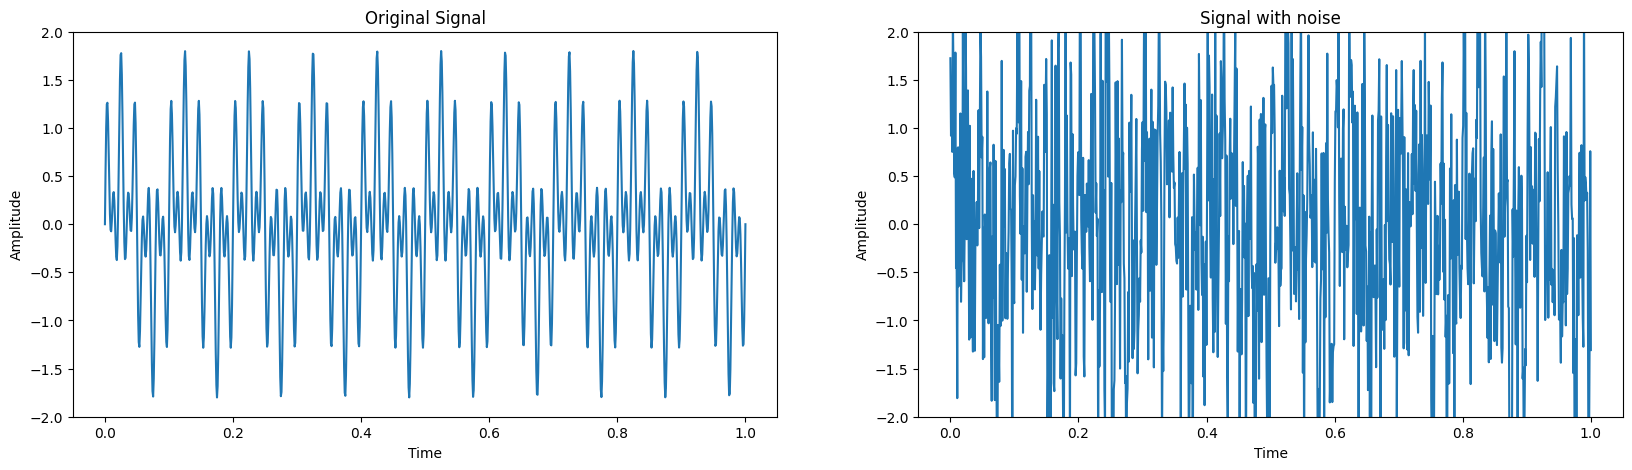

In [56]:
def x(t):
    return 0.6* np.sin(2*np.pi*90*t) + 0.5*np.sin(2*np.pi*10*t) + 0.7*np.sin(2*np.pi*50*t)

# Create a signal
N = 1024
t = np.linspace(0,1,N)
x_t = x(t)

_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
#plot the signal
ax1.plot(t,x_t)

# noise
x_t += np.random.normal(0,0.9,N)

#plot the signal
ax2.plot(t,x_t)
#shared y axis for ax1 and ax2
ax1.set_ylim(-2.0,2.0)
ax2.set_ylim(-2.0,2.0)

# annotate the plot and axis
ax1.set_title("Original Signal")
ax2.set_title("Signal with noise")
ax1.set_xlabel("Time")
ax2.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax2.set_ylabel("Amplitude")
plt.show()



Test the DFT

Text(0, 0.5, 'Amplitude')

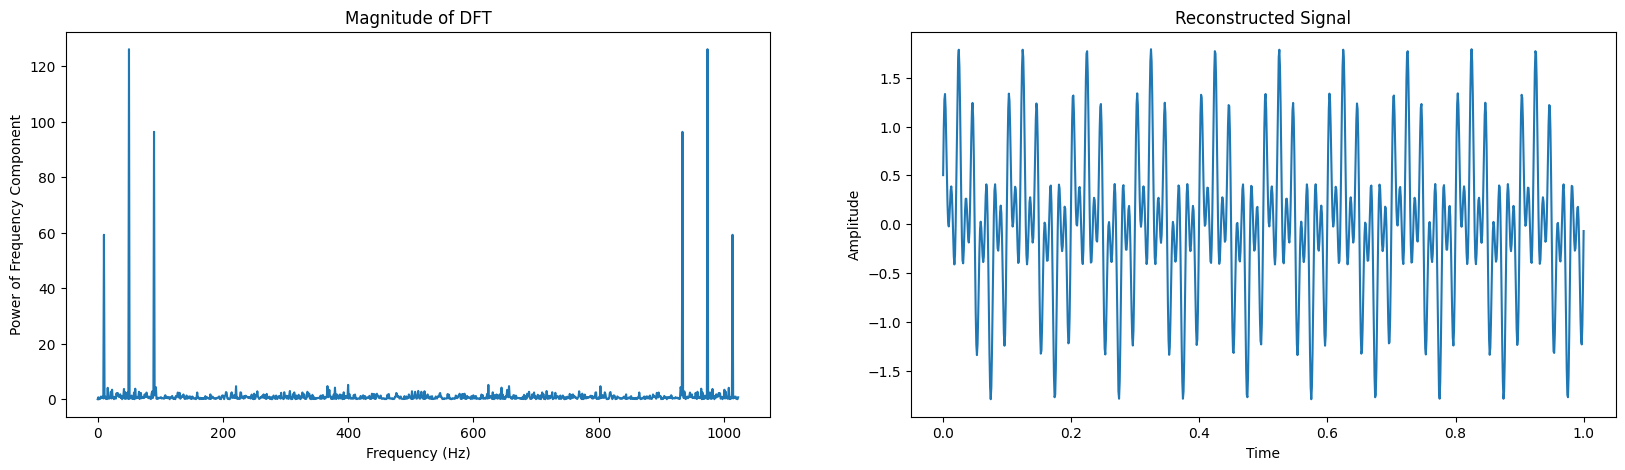

In [60]:
X= dft(x_t)
X_mag = (np.abs(X)**2) / N

_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
#plot the magnitude
ax1.plot(X_mag)
ax1.set_title("Magnitude of DFT")
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Power of Frequency Component")

# set coefficients to zero where the magnitude is less than 20
X[X_mag < 20] = 0

#plot the reconstructed signal
x_reconstructed = idft(X)
ax2.plot(t,x_reconstructed)
ax2.set_title("Reconstructed Signal")
ax2.set_xlabel("Time")
ax2.set_ylabel("Amplitude")


The Function for the Fourier transform seems to work, since the power spectrum shows peaks exactly at the dominant frequencies in the signal. Also the inverse transformation seems to work, since the reconstructed signal is very similar to the original, unnoisy signal.

What we dont understand is the symmetry of the power spectrum. It seems to be symmetric at N/2, which makes little sense to us. Maybe we oversee some periodicity in the frequencies and the right side of the plot is supposed to be negative frequencies

## Exercise 2 ##

### Task 1 ###

We create the described data and plot it over time


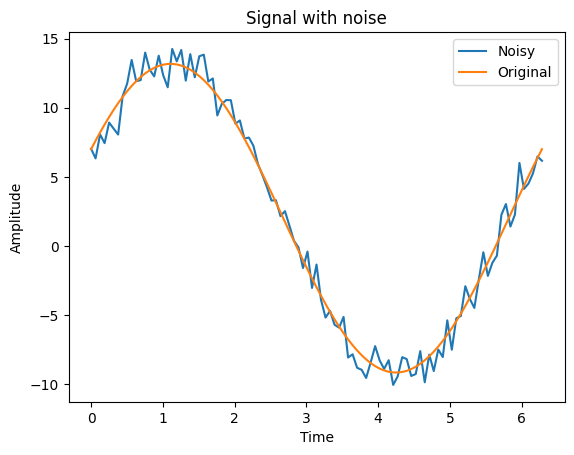

In [89]:
# Parameters beta
beta = [2,10,5]
N = 101
t = np.linspace(0,2*np.pi,N)
# Create the signal
X_t = beta[0]*np.ones(N) + beta[1]*np.sin(t) + beta[2]*np.cos(t) 
original_signal = X_t.copy()
X_t += np.random.normal(0,1,N)

#plot
plt.plot(t,X_t, label="Noisy")
plt.plot(t,original_signal, label="Original")
plt.title("Signal with noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()



### Task 2 ###

We compute the LSE:
$\hat{\beta}_{LSE} = \min_{\beta}\sum_{i=0}^{100} (x_{t_i} - \beta_0 + \beta_1 \sin(t_i) + \beta_2 \cos(t_i))^2$

where $x_{t_i}$ are the observations in the i-th time step.

We use the results of the lecture:

$\hat{\beta}_{LSE} = (X^TX)^{-1}X^Tx$

where $x = (x_{t_0},...,x_{t_{100}})$ the observed values

and 
$X =  \left(\begin{array}{ccc}
1 & sin(t_0) & cos(t_0)\\
1 & sin(t_1) & cos(t_1)\\
1 & sin(t_2) & cos(t_2)\\
\vdots & \vdots & \vdots \\
1 & sin(t_{100}) & cos(t_{100})\\
\end{array}\right) \in \mathbb{R}^{101 \times 3}$

Estimated beta:  [ 1.99123598 10.20607369  4.91346346]


Text(0.5, 0, 'Time')

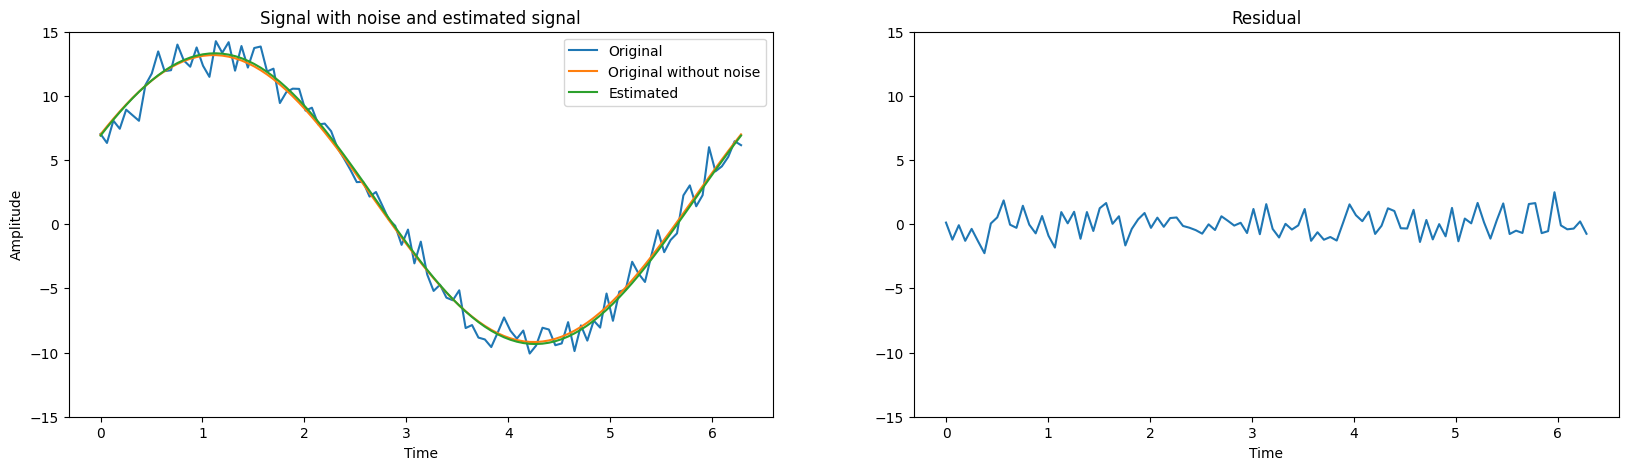

In [102]:
# Create Matrix X
X = np.zeros((N, 3))
X[:,0] = np.ones(N)
X[:,1] = np.sin(t)
X[:,2] = np.cos(t)

# Caclulate X^T*X and its inverse
XtX = np.dot(X.T,X)
XtX_inv = np.linalg.inv(XtX)

# Get an estimate for beta
estimated_beta = np.dot(np.dot(XtX_inv,X.T),X_t)
reconstructed_signal = estimated_beta[0]*np.ones(N) + estimated_beta[1]*np.sin(t) + estimated_beta[2]*np.cos(t)
print("Estimated beta: ", estimated_beta)

_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
# Plot reconstructed signal with original signal and their difference
ax1.plot(t,X_t, label="Original")
ax1.plot(t,original_signal, label="Original without noise")
ax1.plot(t,reconstructed_signal, label="Estimated")

# Annotate the Plot
ax1.set_title("Signal with noise and estimated signal")
ax2.set_title("Residual")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.legend()
ax2.plot(t,X_t - reconstructed_signal, label="Residual")
ax2.set_ylim(-15,15)
ax1.set_ylim(-15,15)
ax2.set_xlabel("Time")


### Task 3 ###
QQ-Plot

Text(0.5, 0, 'observed signal')

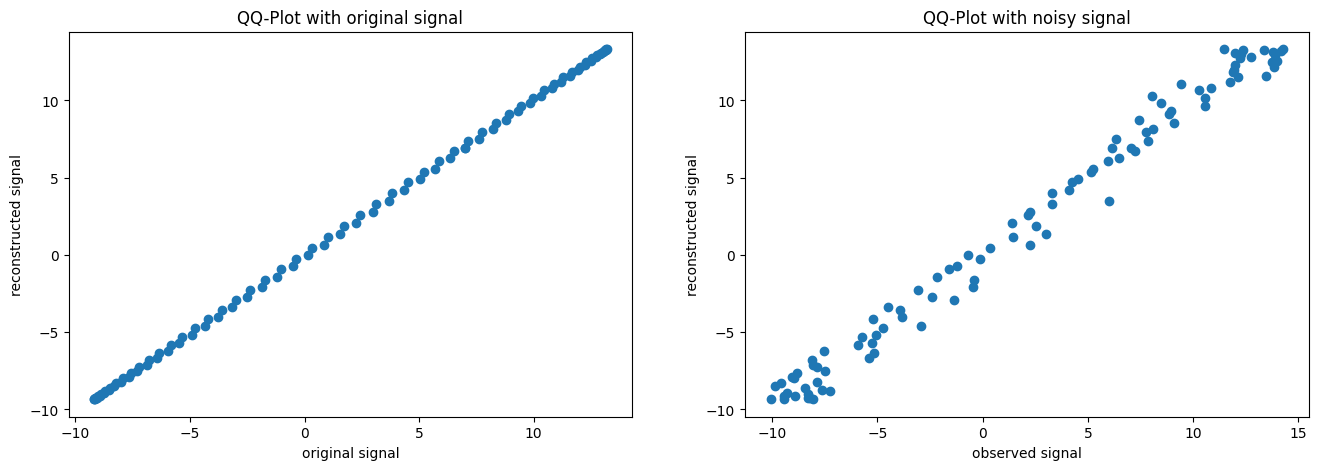

In [100]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
ax1.scatter(original_signal, reconstructed_signal)
ax1.set_title("QQ-Plot with original signal")
ax1.set_ylabel("reconstructed signal")
ax1.set_xlabel("original signal")

ax2.scatter(X_t, reconstructed_signal)
ax2.set_title("QQ-Plot with noisy signal")
ax2.set_ylabel("reconstructed signal")
ax2.set_xlabel("observed signal")

Histogram of residual

Text(0.5, 1.0, 'Histogram of residuals')

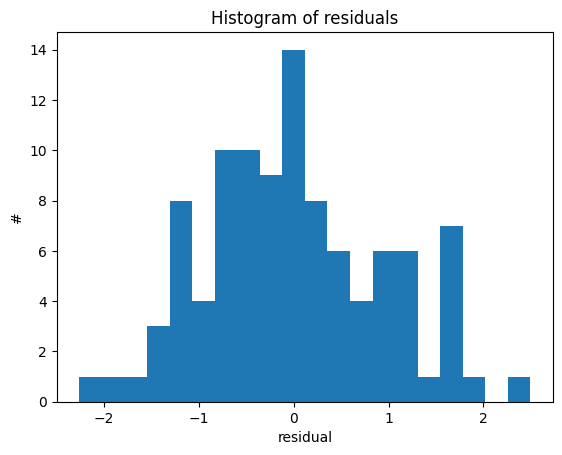

In [112]:
plt.hist(X_t-reconstructed_signal, bins=20)
plt.xlabel('residual')
plt.ylabel("#")
plt.title("Histogram of residuals")
##test

### Task 4 - Another Model ###
We calculate the Matrix X again, now it has different dimensions. The rest stays the same and we repeat the steps 2 and 3:

$X =  \left(\begin{array}{cc}
1 & cos(t_0)\\
1 & cos(t_1)\\
1 & cos(t_2)\\
\vdots & \vdots \\
1 &  cos(t_{100})\\
\end{array}\right) \in \mathbb{R}^{101 \times 2}$

Estimated beta:  [1.99123598 4.91346346]


Text(0.5, 0, 'Time')

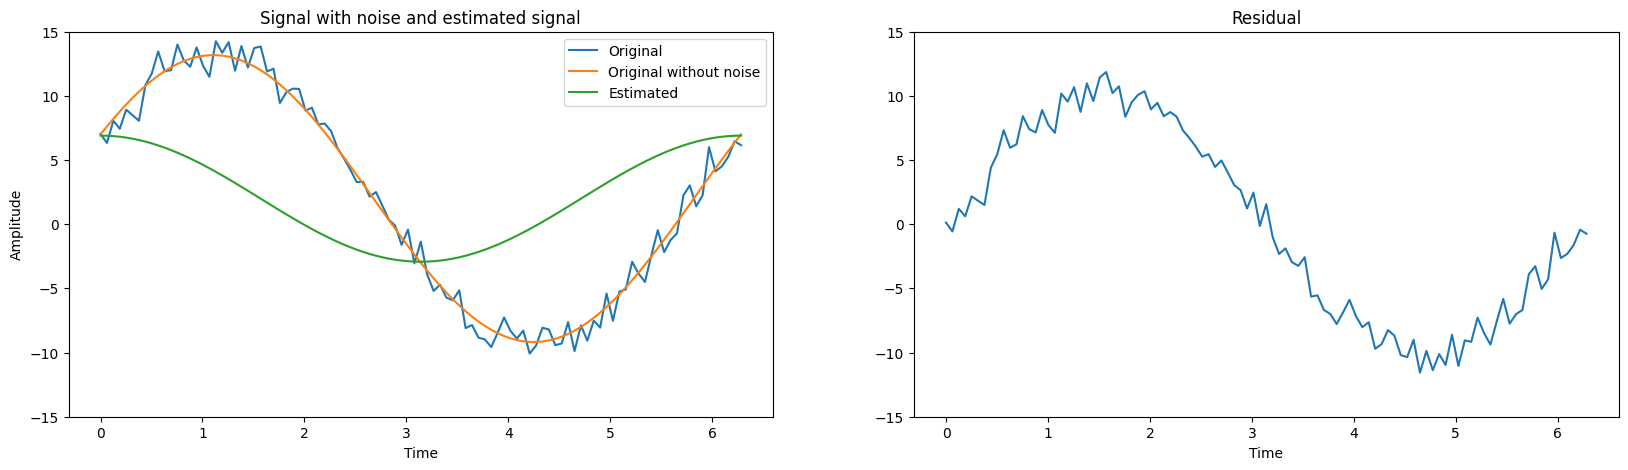

In [115]:
# Create Matrix X
X = np.zeros((N, 2))
X[:,0] = np.ones(N)
X[:,1] = np.cos(t)

# Caclulate X^T*X and its inverse
XtX = np.dot(X.T,X)
XtX_inv = np.linalg.inv(XtX)

# Get an estimate for beta
estimated_beta = np.dot(np.dot(XtX_inv,X.T),X_t)
reconstructed_signal = estimated_beta[0]*np.ones(N) + estimated_beta[1]*np.cos(t)
print("Estimated beta: ", estimated_beta)

_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
# Plot reconstructed signal with original signal and their difference
ax1.plot(t,X_t, label="Original")
ax1.plot(t,original_signal, label="Original without noise")
ax1.plot(t,reconstructed_signal, label="Estimated")

# Annotate the Plot
ax1.set_title("Signal with noise and estimated signal")
ax2.set_title("Residual")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.legend()
ax2.plot(t,X_t - reconstructed_signal, label="Residual")
ax2.set_ylim(-15,15)
ax1.set_ylim(-15,15)
ax2.set_xlabel("Time")

Text(0.5, 0, 'observed signal')

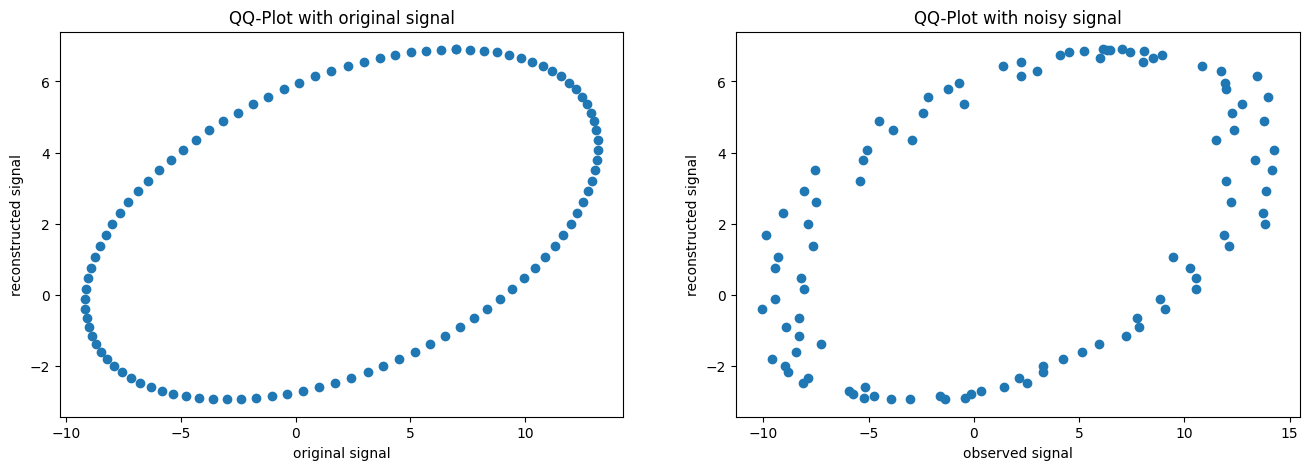

In [116]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
ax1.scatter(original_signal, reconstructed_signal)
ax1.set_title("QQ-Plot with original signal")
ax1.set_ylabel("reconstructed signal")
ax1.set_xlabel("original signal")

ax2.scatter(X_t, reconstructed_signal)
ax2.set_title("QQ-Plot with noisy signal")
ax2.set_ylabel("reconstructed signal")
ax2.set_xlabel("observed signal")

Text(0.5, 1.0, 'Histogram of residuals')

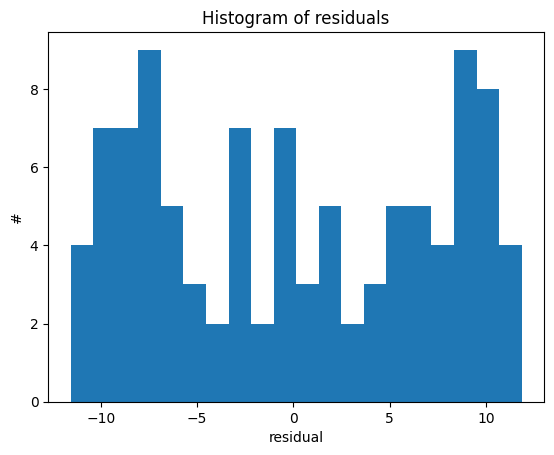

In [117]:
plt.hist(X_t-reconstructed_signal, bins=20)
plt.xlabel('residual')
plt.ylabel("#")
plt.title("Histogram of residuals")
##test

Now, the Histogram is not normal distributed around 0 and the QQ-Plot is not a diagonal line. This leads us to the conclusion that the chosen model is not suitable for the process (It lacks the sine component from before and therefor can't describe the process anymore)

## Exercise 3 ##